# Lab 2: Statistics

## Exercise 1

In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.special import factorial

In [2]:
#plotting settings
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

In [3]:
#function for empirically simulating a coin toss
#input N_coins - number of coins tossed per trial x_heads - number of heads for which you want the probability
#ntimes - optional - set the number of times the simulation is run
def P_obsv(N_coins, x_heads, ntimes=100000):
    
    nheads = 0
    
    for n in range(ntimes):
        #getting random 0s and 1s
        draw = np.random.randint(2, size=N_coins)
        
        #counting number of 1s
        heads_count = len(draw[np.where(draw==1)])
        
        #checking if we got the desired number of heads
        if heads_count == x_heads:
            nheads+=1
            
    #dividing the total number of times we got heads by the number of trials
    p_x = nheads/ntimes
    
    #returning probability
    return(p_x)

In [4]:
#running this function for a set of 20 coins, tossed 100,000 times
xvals = np.arange(0,21)
pvals = np.zeros(xvals.shape)
for x in xvals:
    pvals[x]=P_obsv(20,x,ntimes=100000)

#### Part (a)

Text(0, 0.5, 'Observed Probability')

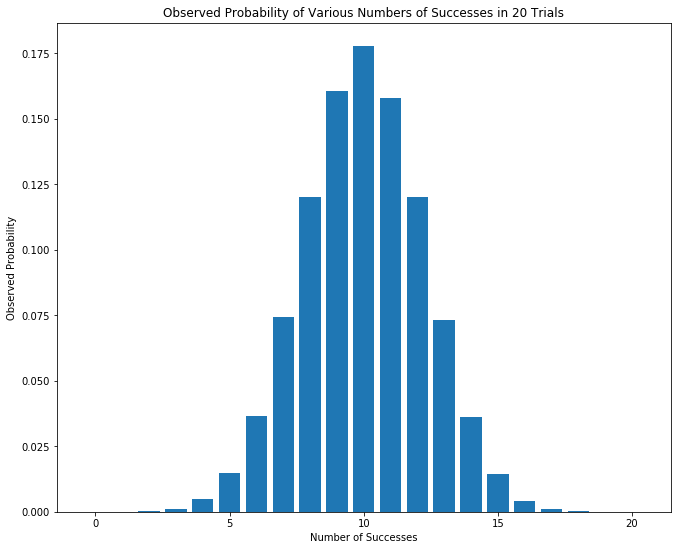

In [5]:
#plotting the result of empirically tossing 20 coins for 100,000 times
plt.bar(xvals,pvals)
plt.title('Observed Probability of Various Numbers of Successes in 20 Trials')
plt.xlabel('Number of Successes')
plt.ylabel('Observed Probability')

#### Part (d) and (e)

In [6]:
#This function gives the analytical probability of getting x_heads heads from N_coins being tossed.
#Input N_coins - number of coins, and x_heads - number of heads
def CoinBinomial(N_coins, x_heads):
    p = 0.5
    #plugging N_coins and x_heads into the Binomial Probability function
    PNx = factorial(N_coins)/((factorial(x_heads)*factorial(N_coins-x_heads)))*((0.5)**N_coins)
    #returning probability
    return PNx

In [7]:
#Running the above function for all possible values of x
p_binom = np.zeros(xvals.shape)
for x in xvals:
    p_binom[x] = CoinBinomial(20,x)

Text(0, 0.5, 'Probability')

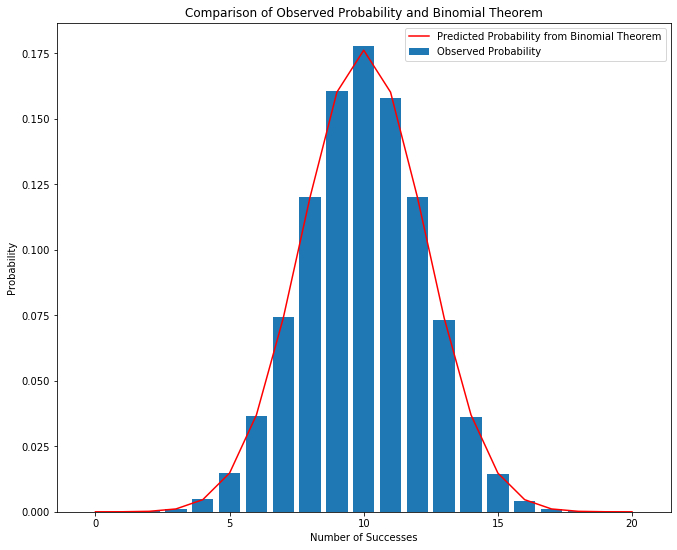

In [8]:
#Plotting the results from part (a) while adding the results from above
plt.bar(xvals,pvals, label='Observed Probability')
plt.plot(xvals, p_binom, color='r', label = 'Predicted Probability from Binomial Theorem')
plt.legend()
plt.title('Comparison of Observed Probability and Binomial Theorem')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')

#### Part (f)

In [9]:
#Function finding the expected value of the empirical method
#Input N_coins - number of coins
def ExpecVal(N_coins):
    #making array of all possible number of heads
    xvals = np.arange(N_coins+1)
    pvals = np.zeros(xvals.shape)
    
    #finding probability of all possible number of heads
    for x in xvals:
        pvals[x] = P_obsv(N_coins,x,ntimes=100000)
    
    ex_val = 0
    
    #summing over x, adding x times its probability
    for x in xvals:
        ex_val += x*pvals[x]
        
    #returning expected value
    return ex_val

In [10]:
#Finding expected value from the analytical Binomial Distribution equation
#Input N_coins - number of coins
def ExpecValfromBinom(N_coins):
    #making array of all possible number of heads
    xvals = np.arange(N_coins+1)
    pvals = np.zeros(xvals.shape)
    
    #finding probability of all possible number of heads
    for x in xvals:
        pvals[x] = CoinBinomial(N_coins, x)
    
    ex_val = 0
    
    #summing over x, adding x times its probability
    for x in xvals:
        ex_val += x*pvals[x]
        
    #returning expected value
    return ex_val 

In [11]:
#The theoretical result of the expectation value for the Binomial Distribution
#Input N_coins - the number of coins
def TheoryBinomExpecVal(N_coins):
    p=0.5
    #returning theoretical expected value, N*p
    return N_coins*p

In [12]:
print('The expected value found from the experimental trials is {}.'.format(ExpecVal(20)),  'The expected value gained from using the probability density function for the Binomial distribution is {}.'.format(ExpecValfromBinom(20)), 'Theoretically, the Binomial Distribution expected value given by N*p is {}.'.format(TheoryBinomExpecVal(20)))

The expected value found from the experimental trials is 10.018629999999998. The expected value gained from using the probability density function for the Binomial distribution is 10.0. Theoretically, the Binomial Distribution expected value given by N*p is 10.0.


In [13]:
print('The expected value found from the experimental trials is {}.'.format(ExpecVal(40)),  'The expected value gained from using the probability density function for the Binomial distribution is {}.'.format(ExpecValfromBinom(40)), 'Theoretically, the Binomial Distribution expected value given by N*p is {}.'.format(TheoryBinomExpecVal(40)))

The expected value found from the experimental trials is 19.95362. The expected value gained from using the probability density function for the Binomial distribution is 20.000000000000004. Theoretically, the Binomial Distribution expected value given by N*p is 20.0.


## Exercise 2

#### Part (a)

In [14]:
#Function for the Binomial Distribution with vany given probability p
#Input N_coins - number of coins, and x_heads - number of heads, and p - probability
def Binomial(N_coins, x_heads, p):
    #Plugging into Binomial Probability Formula
    PNx = factorial(N_coins)/((factorial(x_heads)*factorial(N_coins-x_heads)))*((p)**x_heads)*((1-p)**(N_coins-x_heads))
    #Returning probability
    return PNx

In [15]:
#Method of empirically finding a probability of getting x_heads heads from N_coins coins if the coin has a success
#probabilty of p
#Input N_coins - number of coins, and x_heads - number of heads, and p - probability, and ntimes - number of times
# to run the simulation
def P_obsv_General(N_coins, x_heads, p, ntimes=100000):
    
    nheads = 0
    
    #looping over all the simulation runs
    for n in range(ntimes):
        #making array of random numbers between 0 and 1
        draw = np.random.random(N_coins)
        #counting where the number is less than or equal to the probability
        heads_count = len(draw[np.where(draw<=p)])
        
        #checking if the number of heads matches the desired number
        if heads_count == x_heads:
            nheads+=1
             
    #dividing the number of times we got the heads we want by the number of trials
    p_x = nheads/ntimes
    
    #returning probability
    return p_x

In [16]:
#Analytic definition of the Poisson distribution
#input x_success - number of successes, N_trials - number of trials, p-probability of success
def PoissonDistribution(x_success, N_trials, p):
    rate = N_trials*p
    Px = np.exp(-rate)*((rate**x_success)/factorial(x_success))
    return Px

#### Part (b) and (c)

In [17]:
#Calculating Empirical, Analytical Poisson, and Analytical Binomial Probabilties for 100 coins.

xvals = np.arange(0,101)
pvals = np.zeros(xvals.shape)
poisson_p = np.zeros(xvals.shape)
p_binom = np.zeros(xvals.shape)
for x in xvals:
    pvals[x]=P_obsv_General(100, x, 0.001, ntimes=100000)
    p_binom[x] = Binomial(100,x, 0.001)
    poisson_p[x] = PoissonDistribution(x, 100, 0.001)

Text(0.5, 0, 'Number of Successes')

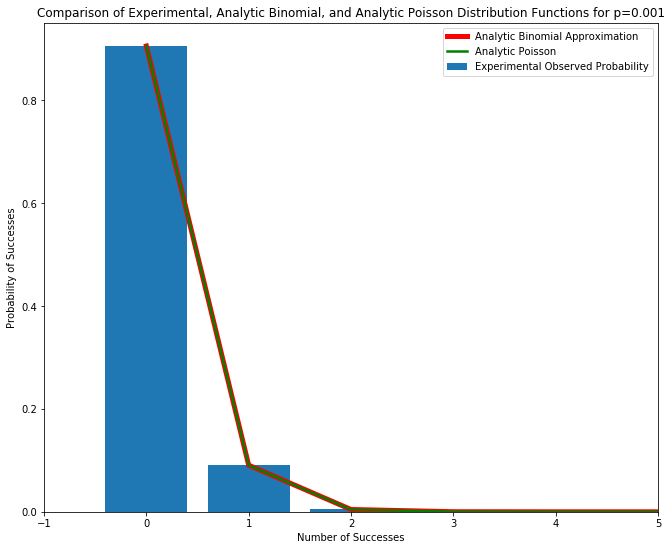

In [18]:
#Plotting the above results
plt.bar(xvals,pvals, label='Experimental Observed Probability')
plt.plot(xvals,p_binom, color='r', linewidth=5, label = 'Analytic Binomial Approximation')
plt.plot(xvals,poisson_p, color='green', linewidth=2.5, label = 'Analytic Poisson')
plt.xlim([-1,5])
plt.legend()
plt.title('Comparison of Experimental, Analytic Binomial, and Analytic Poisson Distribution Functions for p=0.001')
plt.ylabel('Probability of Successes')
plt.xlabel('Number of Successes')

#### Part (d)

In [19]:
#Defining a new empirical observation method to make finding variance and mean more efficient
#Input N_coins - number of coins, and p - probability, and ntimes - number of times to run the simulation
def P_obsv_MeanVar(N_coins, p, ntimes=100000):
    
    nheads = 0
    
    counts = np.zeros(N_coins+1)
    
    for n in range(ntimes):
        #making random numbers between 0 and 1
        draw = np.random.random(N_coins)
        #seeing how many places the number is less than or equal to the probability
        heads_count = len(draw[(np.where(draw <=p))])
        #assigning the result to a matrix by the number of heads
        counts[heads_count] = counts[heads_count] + 1
    #return probability of all possible x values - which is number of times that x value occured divided by the 
    #total number of trials
    return counts/ntimes

In [20]:
#This finds mean and variance of a poisson distribution where p<<1
def PoissonMeanAndVariance(N_trials,p):
    #getting all possible x values
    xvals = np.arange(N_trials+1)
    #finding probability of getting each of all possible x values
    pvals = P_obsv_MeanVar(N_trials, p, ntimes=100000)
    #initializing expected value and expected value squared
    ex_val = 0
    ex_val_squared = 0
    
    #looping over and summing over each x value
    for x in xvals:
        #finding expected value <x>
        ex_val += x*pvals[x]
        #finding <x^2>
        ex_val_squared += (x**2)*pvals[x]
    
    #using formula for variance in terms of expected value
    var = (ex_val_squared) - (ex_val**2) 

    #returning variance and expected value
    return var, ex_val

In [21]:
#Finding Mean And Variance for flipping 100 coins 100,000 times with p=0.001
myvar, mymean = PoissonMeanAndVariance(100,0.001)
print('When flipping 10 coins 10,000 times with a probability of 0.001, the mean is {} and the variance is {}.'.format(mymean, myvar))

When flipping 10 coins 10,000 times with a probability of 0.001, the mean is 0.09987 and the variance is 0.09943598309999999.


In [22]:
#Finding Mean And Variance for flipping 100 coins 100,000 times with various p values

minval = 0.001
maxval = 0.3
diff = 0.01

pvals = np.arange(minval,maxval+diff,diff)
varvals = np.zeros(pvals.shape)
meanvals = np.zeros(pvals.shape)

i=0

for p in pvals:
    varvals[i], meanvals[i] = PoissonMeanAndVariance(100,p)
    i+=1
    

Text(0.5, 0, 'Probability')

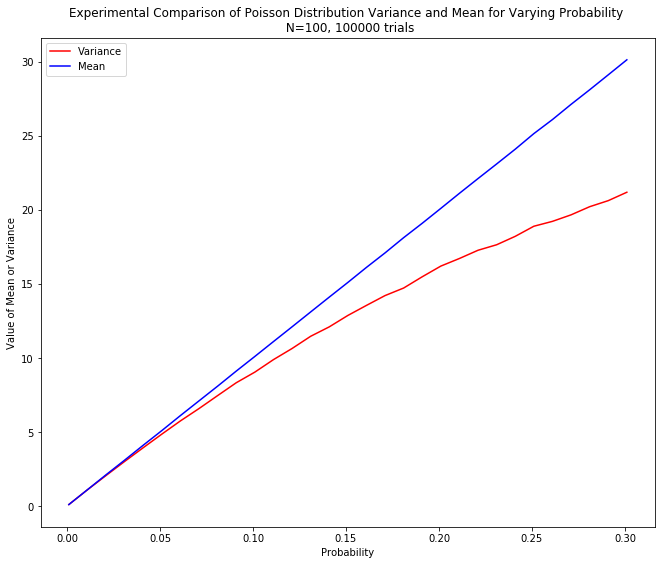

In [23]:
#plotting the result
plt.plot(pvals, varvals, c='r', label='Variance')
plt.plot(pvals, meanvals, c='b', label='Mean')
plt.legend()
plt.title('Experimental Comparison of Poisson Distribution Variance and Mean for Varying Probability \n N=100, 100000 trials')
plt.ylabel('Value of Mean or Variance')
plt.xlabel('Probability')